In [1]:
from IPython.display import HTML, Image
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Week Ten: Linear Regression

# Correlation

* Say we want to measure the price of stamps over time and see if there is a relationship between the year and the price of a stamp
* Specifically we want to see the relationship between the number of years since 1960 and the price of a stamp
* Using what we learned last week, we can find the **covariance** and **correlation** of the relationship.

In [2]:
# Read in Stamp Data
df = pd.read_html('https://en.wikipedia.org/wiki/History_of_United_States_postage_rates', header=0)[0]
#Keep Relevant Columns
df = df[['Date Introduced', 'Letters (for first ounce)']]
df.columns = ['Date', 'Price']
#Edit Price Column
df['Price'] = df['Price'].str.split(' ').str[0]
df['Price'] = df['Price'].str.split('[').str[0]
df['Price'] = df['Price'].astype('float')
#Edit Date Column
df['Date'] = df['Date'].str.split('[').str[0]
df['Date'] = pd.to_datetime(df['Date'])
#Preserve Only Dates After 1960
df = df[df['Date'].dt.year >= 1960].reset_index(drop=True)
df['Date'] = df['Date'].dt.year - 1960

In [3]:
short_df = df.iloc[:4,:]
short_df.columns = ['Years_Since_1960', 'Stamp_Price']
short_df['Years_Deviation'] = short_df['Years_Since_1960'] - short_df['Years_Since_1960'].mean()
short_df['Price_Deviation'] = short_df['Stamp_Price'] - short_df['Stamp_Price'].mean()
short_df['Years_Diff * Price_Diff'] = short_df['Years_Deviation'] * short_df['Price_Deviation']
short_df['slope'] = short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960'])
short_df['intercept'] = short_df['Stamp_Price'].mean() - ((short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960'])) * short_df['Years_Since_1960'].mean())
short_df['Predictions'] = short_df['intercept'] + (short_df['slope'] * short_df['Years_Since_1960'])
short_df['Residuals'] = short_df['Predictions'] - short_df['Stamp_Price']
short_df['Squared_Residuals'] = np.power(short_df['Residuals'], 2)

/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/evanagovino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [4]:
short_df[['Years_Since_1960', 'Stamp_Price']]

,Years_Since_1960,Stamp_Price
0,3,0.05
1,8,0.06
2,11,0.08
3,14,0.10


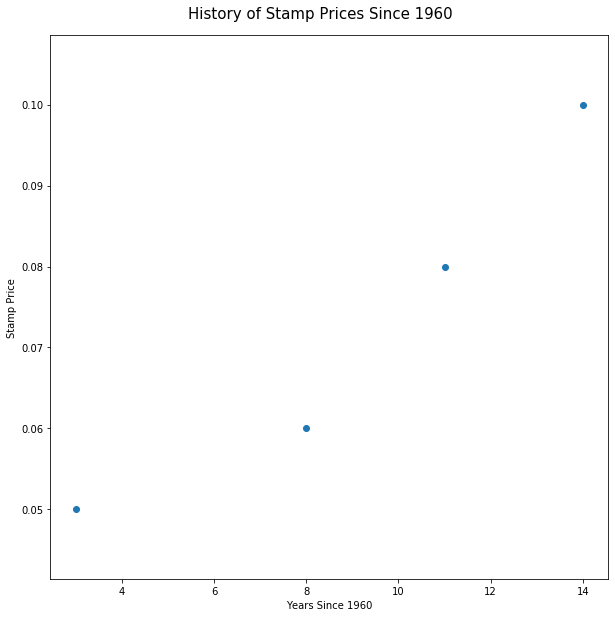

In [5]:
fig = plt.figure(figsize=(10,10))
plt.scatter(short_df['Years_Since_1960'], short_df['Stamp_Price'])
plt.xlabel('Years Since 1960')
plt.ylabel('Stamp Price')
fig.suptitle('History of Stamp Prices Since 1960', fontsize=15, y=0.92)

hide_toggle()

In [6]:
print('Expected Years:', short_df['Years_Since_1960'].mean())
print('Expected Price:', np.round(short_df['Stamp_Price'].mean(), 4))
short_df[['Years_Since_1960', 'Stamp_Price']]

Expected Years: 9.0
Expected Price: 0.0725


,Years_Since_1960,Stamp_Price
0,3,0.05
1,8,0.06
2,11,0.08
3,14,0.10


In [7]:
print('Expected Years:', short_df['Years_Since_1960'].mean())
print('Expected Price:', np.round(short_df['Stamp_Price'].mean(), 4))
short_df[['Years_Since_1960', 'Stamp_Price', 'Years_Deviation', 'Price_Deviation']]

Expected Years: 9.0
Expected Price: 0.0725


,Years_Since_1960,Stamp_Price,Years_Deviation,Price_Deviation
0,3,0.05,-6.0,-0.0225
1,8,0.06,-1.0,-0.0125
2,11,0.08,2.0,0.0075
3,14,0.10,5.0,0.0275


In [8]:
print('Covariance:', np.round(short_df['Years_Diff * Price_Diff'].mean(), 4))
short_df[['Years_Since_1960', 'Stamp_Price', 'Years_Deviation', 'Price_Deviation', 'Years_Diff * Price_Diff']]

Covariance: 0.075


,Years_Since_1960,Stamp_Price,Years_Deviation,Price_Deviation,Years_Diff * Price_Diff
0,3,0.05,-6.0,-0.0225,0.1350
1,8,0.06,-1.0,-0.0125,0.0125
2,11,0.08,2.0,0.0075,0.0150
3,14,0.10,5.0,0.0275,0.1375


In [9]:
print('Covariance:', np.round(short_df['Years_Diff * Price_Diff'].mean(), 4))
print('Years Standard Deviation:', np.round(np.std(short_df['Years_Since_1960']), 4))
print('Price Standard Deviation:', np.round(np.std(short_df['Stamp_Price']), 4))
print('Correlation:', np.round((0.07)/(4.062 * 0.0192), 2), 'Strong Positive Correlation')
short_df[['Years_Since_1960', 'Stamp_Price', 'Years_Deviation', 'Price_Deviation', 'Years_Diff * Price_Diff']]

Covariance: 0.075
Years Standard Deviation: 4.062
Price Standard Deviation: 0.0192
Correlation: 0.9 Strong Positive Correlation


,Years_Since_1960,Stamp_Price,Years_Deviation,Price_Deviation,Years_Diff * Price_Diff
0,3,0.05,-6.0,-0.0225,0.1350
1,8,0.06,-1.0,-0.0125,0.0125
2,11,0.08,2.0,0.0075,0.0150
3,14,0.10,5.0,0.0275,0.1375


As we discussed last week, this comes with the caveat that the relationship between these two variables is expected to be **linear**.

# Least Squares Fit

* The equation y = mx + b can approximate the linear relationship between two variables.
* It insinuates that a given y value is equal to a given x value multiplied by m (the slope) + a constant intercept (b).
* The **slope** answers the question "If I change X by one unit, how much does Y change by?"
* The **intercept** is the value of Y when is is 0.

# Least Squares Fit

* For a **least squares fit**, the slope is equal to the **covariance** of X and Y divided by the variance of X.
* The **intercept** is equal to the mean of Y minus the **slope** times the **mean of X**.

# Least Squares Fit

* The vertical deviation between a given data point and the line approximating the linear relationship is called a **residual**
* We want to minimize the residual values so that we ensure our line is as accurate as possible in mapping the relationship between our two variables
* Specifically we want to **minimize** the sum of squared residual values. This is called a **linear least squares fit**.

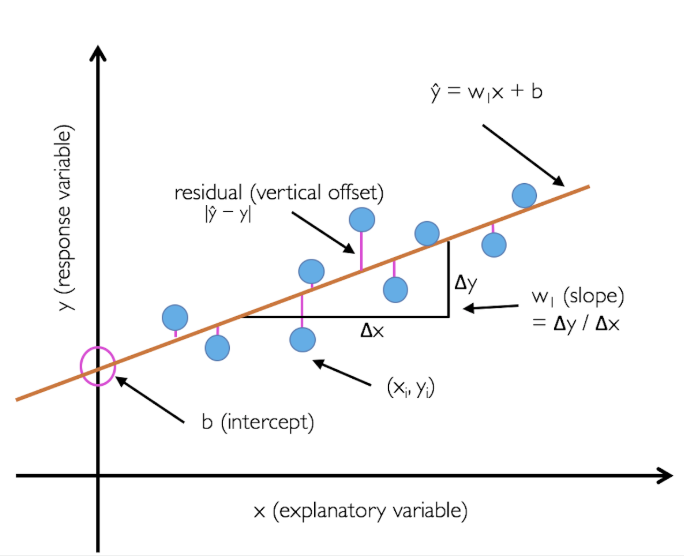

In [10]:
Image("data/least_squares.png")

In [11]:
print('Covariance:', np.round(short_df['Years_Diff * Price_Diff'].mean(), 4))
print('Mean of X:', np.round(short_df['Years_Since_1960'].mean(), 4))
print('Mean of Y:', np.round(short_df['Stamp_Price'].mean(), 4))
print('Variance of X:', np.round(np.var(short_df['Years_Since_1960']), 4))
print()
print('Slope of X:', np.round(short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960']), 4))
print('Intercept:', np.round(short_df['Stamp_Price'].mean() - ((short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960'])) * short_df['Years_Since_1960'].mean()), 4)) 
short_df[['Years_Since_1960', 'Stamp_Price', 'Years_Deviation', 'Price_Deviation', 'Years_Diff * Price_Diff']]

Covariance: 0.075
Mean of X: 9.0
Mean of Y: 0.0725
Variance of X: 16.5

Slope of X: 0.0045
Intercept: 0.0316


,Years_Since_1960,Stamp_Price,Years_Deviation,Price_Deviation,Years_Diff * Price_Diff
0,3,0.05,-6.0,-0.0225,0.1350
1,8,0.06,-1.0,-0.0125,0.0125
2,11,0.08,2.0,0.0075,0.0150
3,14,0.10,5.0,0.0275,0.1375


Now that we have the slope and intercept of this relationship, we can make **predictions** for what the value of Y will be given the value of X!

In [12]:
print('Slope of X:', np.round(short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960']), 4))
print('Intercept:', np.round(short_df['Stamp_Price'].mean() - ((short_df['Years_Diff * Price_Diff'].mean() / np.var(short_df['Years_Since_1960'])) * short_df['Years_Since_1960'].mean()), 4)) 
short_df[['Years_Since_1960', 'Stamp_Price', 'Predictions']]

Slope of X: 0.0045
Intercept: 0.0316


,Years_Since_1960,Stamp_Price,Predictions
0,3,0.05,0.045227
1,8,0.06,0.067955
2,11,0.08,0.081591
3,14,0.10,0.095227


In [13]:
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(short_df['Years_Since_1960'], short_df['Stamp_Price'])

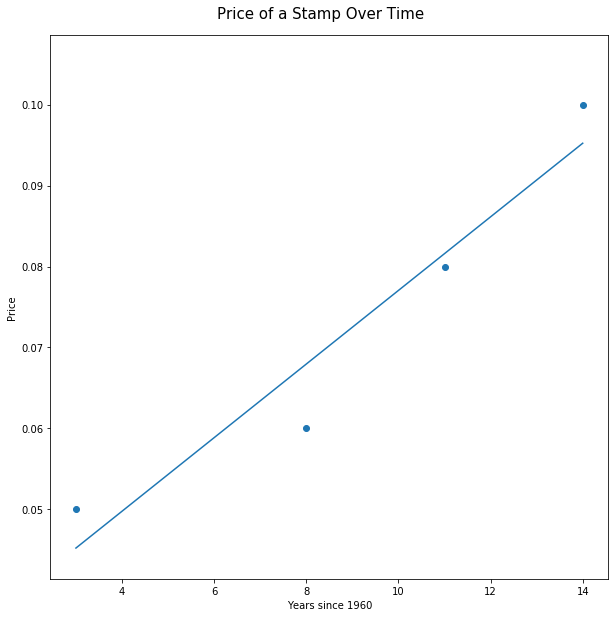

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(short_df['Years_Since_1960'], short_df['Stamp_Price'])
sorted_order = np.argsort(short_df['Years_Since_1960'])
plt.plot(short_df['Years_Since_1960'][sorted_order], predictions[sorted_order])
plt.xlabel('Years since 1960')
plt.ylabel('Price')
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

hide_toggle()

We can even make predictions for values not currently in the dataset.

In [15]:
print('Prediction for 1 years since 1960:', np.round(intercept + (1 * slope), 4))
print('Prediction for 5 years since 1960:', np.round(intercept + (5 * slope), 4))
print('Prediction for 10 years since 1960:', np.round(intercept + (10 * slope), 4))
print('Prediction for 30 years since 1960:', np.round(intercept + (30 * slope), 4))
short_df[['Years_Since_1960', 'Stamp_Price', 'Predictions']]

Prediction for 1 years since 1960: 0.0361
Prediction for 5 years since 1960: 0.0543
Prediction for 10 years since 1960: 0.077
Prediction for 30 years since 1960: 0.168


,Years_Since_1960,Stamp_Price,Predictions
0,3,0.05,0.045227
1,8,0.06,0.067955
2,11,0.08,0.081591
3,14,0.10,0.095227


# Residuals

* The **residuals** are the difference between the **predicted** value of the response variable and the actual value of the response variable.
* Least squares fit is a regression model that minimizes the **squared residuals**.

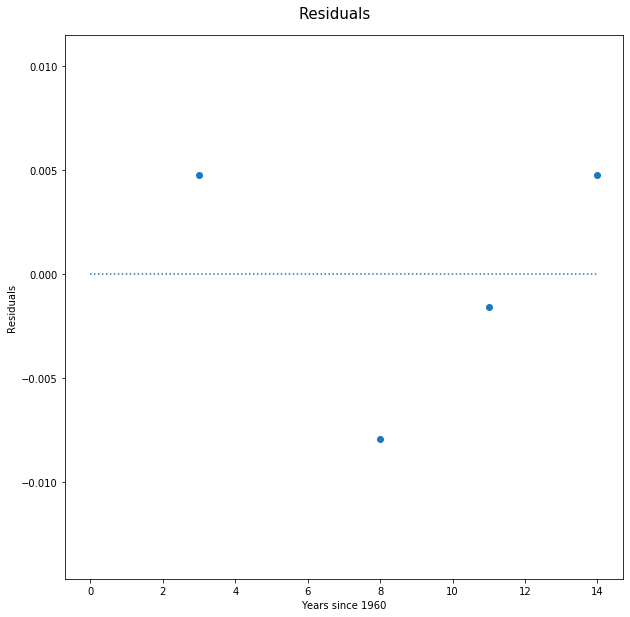

In [16]:
fig = plt.figure(figsize=(10,10))
plt.scatter(short_df['Years_Since_1960'], residuals)
plt.plot([0, short_df['Years_Since_1960'].max()], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

hide_toggle()

In [17]:
short_df[['Years_Since_1960', 'Stamp_Price', 'Predictions', 'Residuals', 'Squared_Residuals']]

,Years_Since_1960,Stamp_Price,Predictions,Residuals,Squared_Residuals
0,3,0.05,0.045227,-0.004773,0.000023
1,8,0.06,0.067955,0.007955,0.000063
2,11,0.08,0.081591,0.001591,0.000003
3,14,0.10,0.095227,-0.004773,0.000023


# Residuals

* There are a few rules the residuals should follow in order for the assumptions of a linear regression to hold.
* The residuals should look like they do above, randomly scattered amongst the graph, with positive and negative values.
* This is called **homoskedasticity**.


# Residuals

* The opposite, where there is a pattern in the residuals, such as what we see below, is called **hetereoskedasticy**
* If the residuals are **hetereoskedastic**, the relationship between the variables isn’t linear!!
* If the residuals show a pattern such as a curve, it means that the fit is not linear, which should also be seen in the initial scatterplot. 

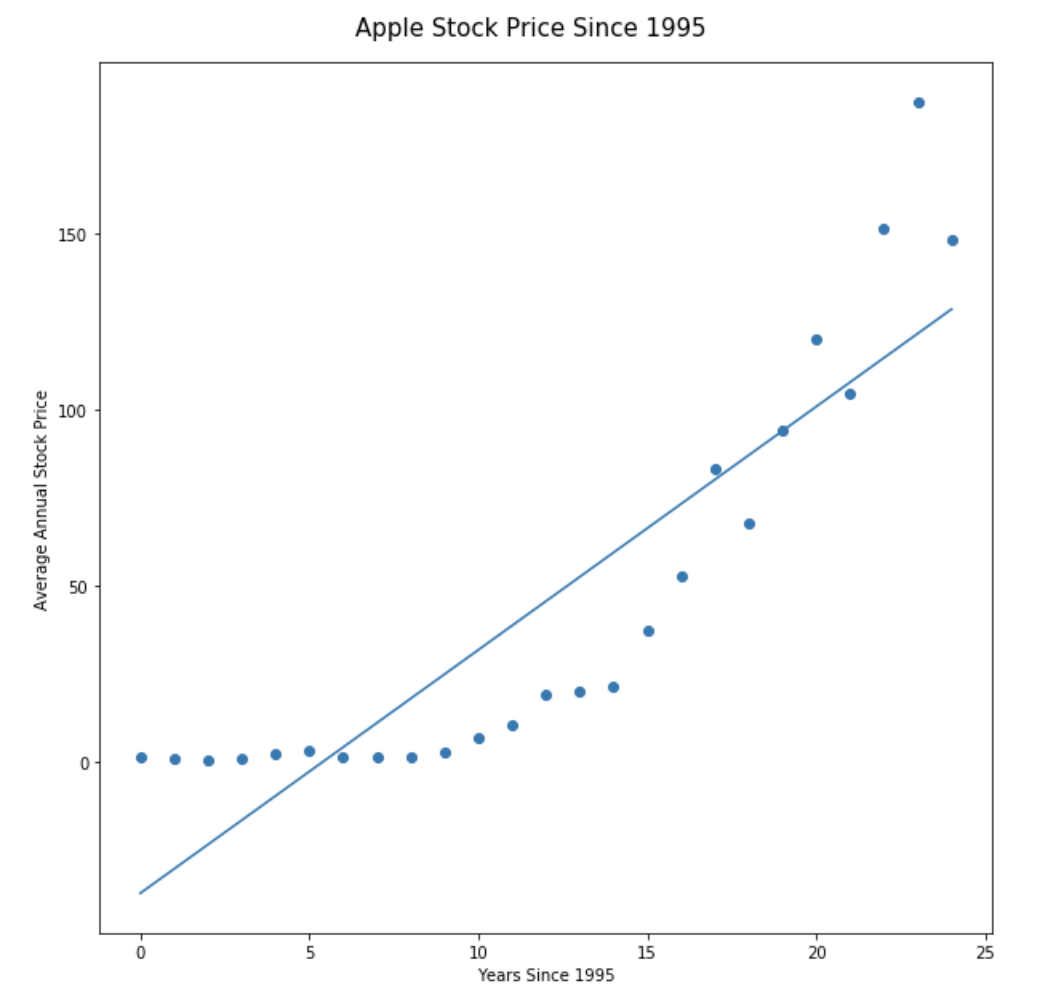

In [18]:
Image("data/curved_relationship.png")

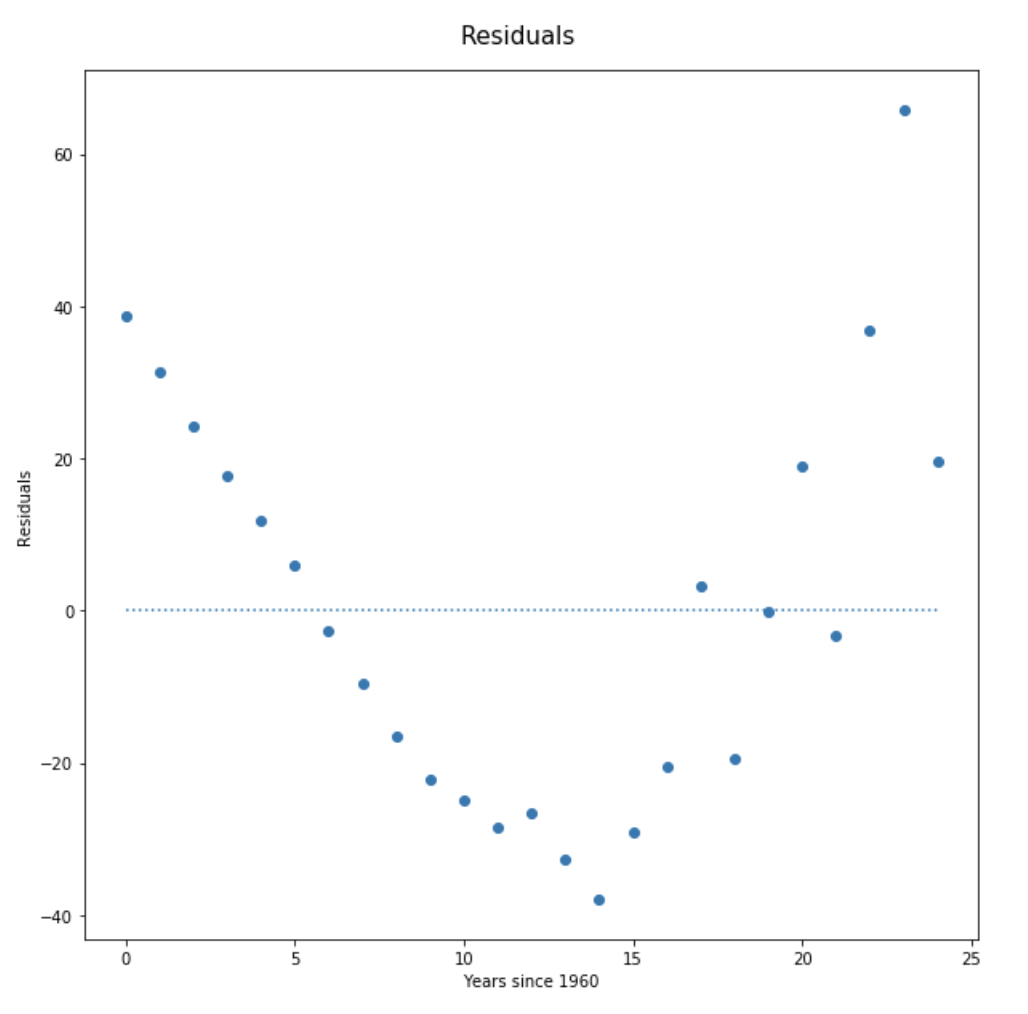

In [19]:
Image("data/heteroskedastic_pattern.png")

# Residuals

* If the residuals don't show a curve pattern but more like a cone, with greater variance at one side of the graph or the other, this means that the response variable probably needs to be transformed to become more normalized, like we reviewed last week.

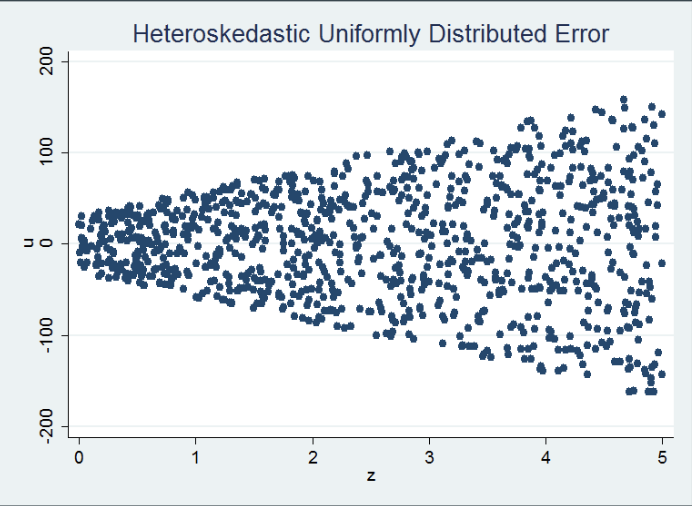

In [20]:
Image("data/heteroskedastic_residuals.png")

# Residuals

* Either way, this is a violation of the assumptions of a linear regression model. The residuals **must be homoskedastic** for the linear model to hold, otherwise the predictions produced by it will be inaccurate.

## Goodness of Fit

* **R-Squared** is a measure of how close the observed data is to your predictions.
* Specifically it measures the “explained variation” over “total variation”, and is on a range between 0 and 100%
* It is the **variance of the predictions** divided by the **variance of the dependent variable** (It is also the squared value of the correlation coefficient)
* The higher the R-squared score the better, though what constitutes a 'good' R-squared score is usually dependent on context.


In [21]:
print('Variance of Stamp Price', np.round(np.var(short_df['Stamp_Price']), 6))
print('Variance of Predictions', np.round(np.var(short_df['Predictions']), 6))
print('R-squared Value', np.round(np.var(short_df['Predictions']) / np.var(short_df['Stamp_Price']), 6))
print()
print('Pearson Correlation:', np.round(stats.pearsonr(short_df['Years_Since_1960'], short_df['Stamp_Price'])[0], 4))
print('R-Squared Value:', np.round(np.power(stats.pearsonr(short_df['Years_Since_1960'], short_df['Stamp_Price'])[0], 2), 4))
short_df[['Years_Since_1960', 'Stamp_Price', 'Predictions', 'Residuals']]

Variance of Stamp Price 0.000369
Variance of Predictions 0.000341
R-squared Value 0.924499

Pearson Correlation: 0.9615
R-Squared Value: 0.9245


,Years_Since_1960,Stamp_Price,Predictions,Residuals
0,3,0.05,0.045227,-0.004773
1,8,0.06,0.067955,0.007955
2,11,0.08,0.081591,0.001591
3,14,0.10,0.095227,-0.004773


The variance of the predictions is 92.45% of the variance of the original stamp price, meaning that 92% of the variance in the predictions is "explained' in the formula.

Now let's look at the entire dataset.

In [22]:
full_slope, full_intercept, full_predictions, full_residuals = utils.evaluate_linear_relationship(df['Date'], df['Price'])

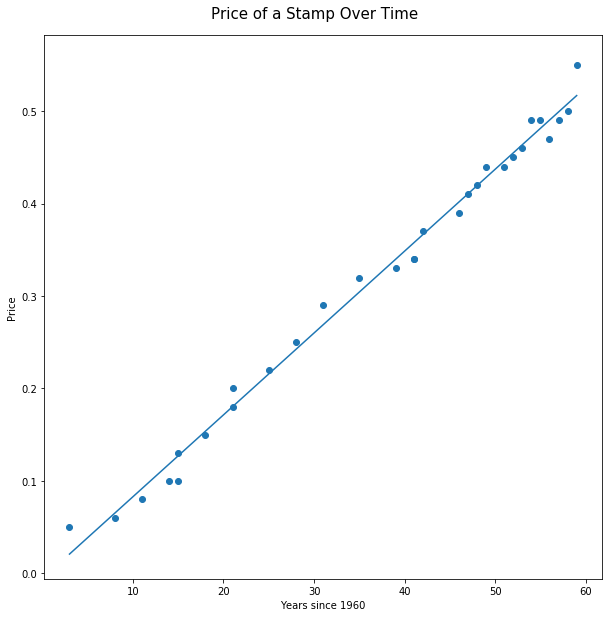

In [23]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'], df['Price'])
sorted_order = np.argsort(df['Date'])
plt.plot(df['Date'][sorted_order], full_predictions[sorted_order])
plt.xlabel('Years since 1960')
plt.ylabel('Price')
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

hide_toggle()

Note how close the data is to the regression line here! This is the sign of a really good fit.

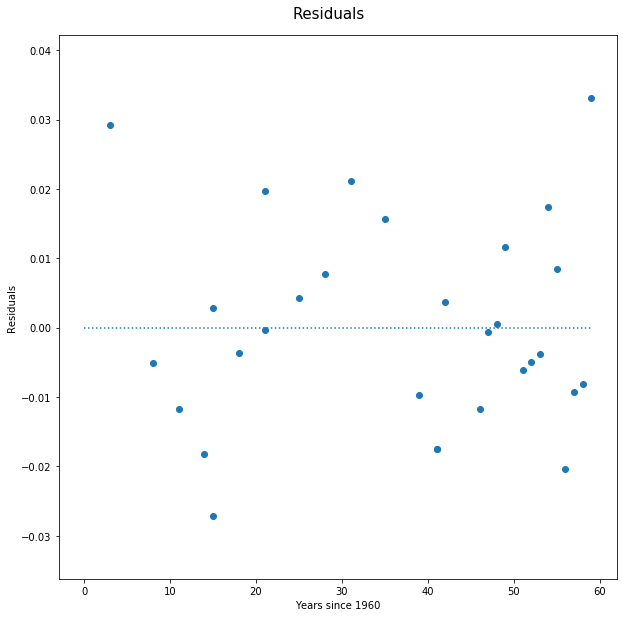

In [24]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'], full_residuals)
plt.plot([0, df['Date'].max()], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

hide_toggle()

In [25]:
print('Variance of Stamp Price', np.round(np.var(df['Price']), 6))
print('Variance of Predictions', np.round(np.var(full_predictions), 6))
print('R-squared Value', np.round(np.var(full_predictions) / np.var(df['Price']), 6))


Variance of Stamp Price 0.023188
Variance of Predictions 0.022975
R-squared Value 0.990849


Here, over 99% of the actual variance in the price of stamps is 'accounted for' by prediction. The passage of time explains almost entirely the change in price in stamps!

# Non-Linear Relationships

* Let's look at the stock price of Apple since 1995 for an example of a non-linear relationship.

In [26]:
#Read in Apple Dataset
prices = pd.read_csv('data/AAPL.csv')
prices['Date'] = pd.to_datetime(prices['Date'])
prices['Date'] = prices['Date'].dt.year
year_prices = prices.groupby('Date')['Close'].mean().reset_index()
year_prices = year_prices.rename(columns={'Close': 'Avg_Price'})
year_prices = year_prices[year_prices['Date'] >= 1995].reset_index(drop=True)
year_prices['Years_Since_1995'] = year_prices['Date'] - 1995
year_prices = year_prices[['Years_Since_1995', 'Avg_Price']]
year_prices.head()

,Years_Since_1995,Avg_Price
0,0,1.407552
1,1,0.856027
2,2,0.618583
3,3,1.089472
4,4,2.123140


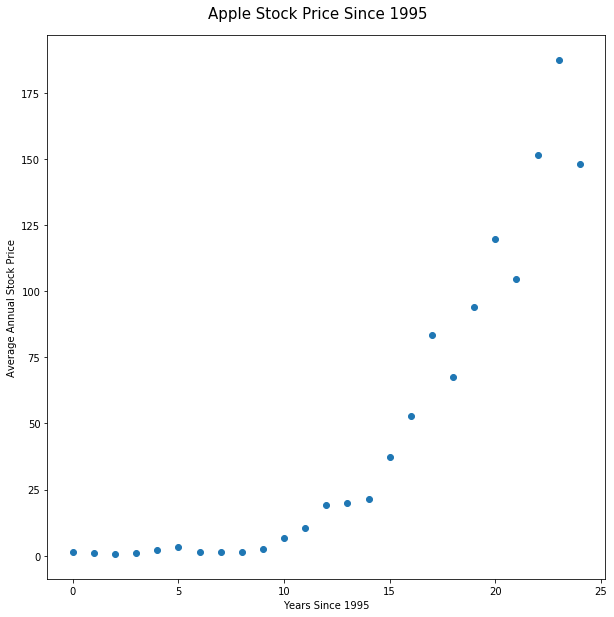

In [43]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], year_prices['Avg_Price'])
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Average Annual Stock Price')

hide_toggle()

## Non-Linear Regression

* While a linear fit can capture the general trend of the data, it leaves a lot to be desired.

In [28]:
apple_slope, apple_intercept, apple_predictions, apple_residuals = utils.evaluate_linear_relationship(year_prices['Years_Since_1995'], year_prices['Avg_Price'])

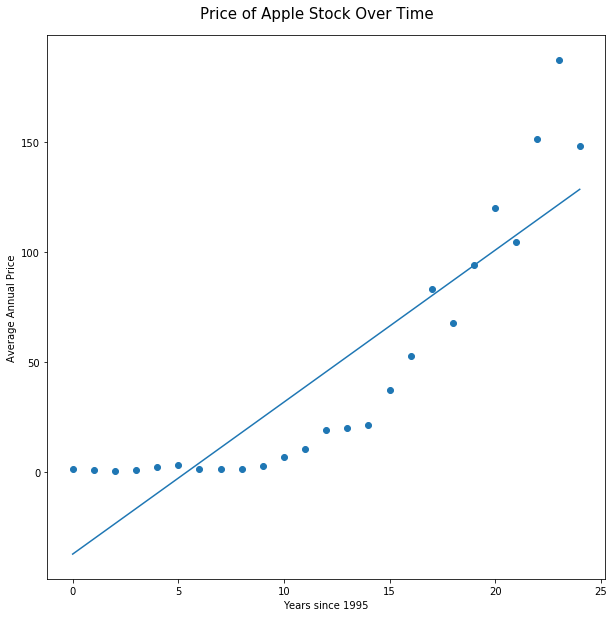

In [29]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], year_prices['Avg_Price'])
sorted_order = np.argsort(year_prices['Years_Since_1995'])
plt.plot(year_prices['Years_Since_1995'][sorted_order], apple_predictions[sorted_order])
plt.xlabel('Years since 1995')
plt.ylabel('Average Annual Price')
fig.suptitle('Price of Apple Stock Over Time', fontsize=15, y=0.92)

hide_toggle()

# Residuals

* Additionally the residuals graph clearly has a pattern, suggesting that the assumptions for linear regression do not hold.

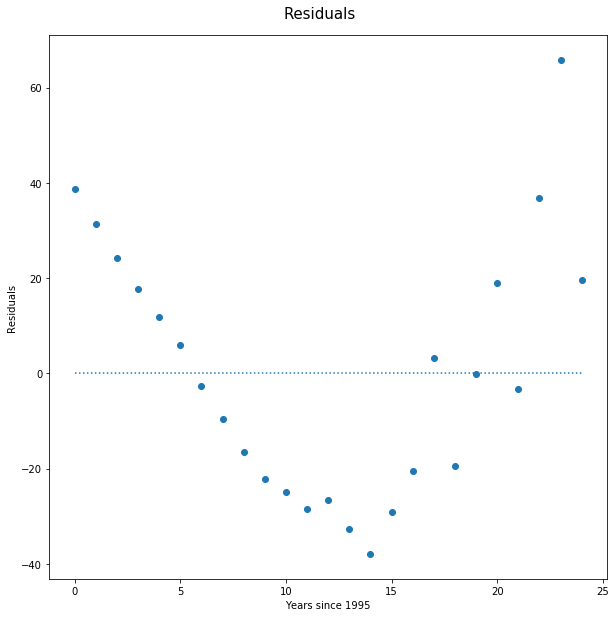

In [30]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], apple_residuals)
plt.plot([0, year_prices['Years_Since_1995'].max()], [0,0], linestyle='dotted')
plt.xlabel('Years since 1995')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

hide_toggle()

In [31]:
print('Variance of Apple Stock', np.round(np.var(year_prices['Avg_Price']), 4))
print('Variance of the Predictions', np.round(np.var(apple_predictions), 4))
print('R-Squared Value', np.round(np.var(apple_predictions)/np.var(year_prices['Avg_Price']), 4))

Variance of Apple Stock 3173.3056
Variance of the Predictions 2486.2249
R-Squared Value 0.7835


* The R-squared value is still 78%, which is relatively high.
* R-squared, much like correlation, isn't enough to evaluate the strength of a linear model - you must confirm that the linear assumptions hold!

# Transformation

* Using what we've learned last week, let's see what transformations we can apply to our data to make it more normal and help the relationship between our variables become more linear.

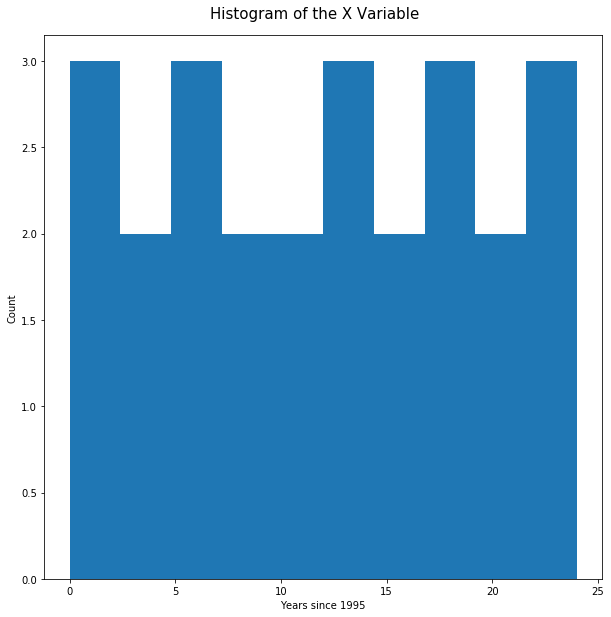

In [44]:
fig = plt.figure(figsize=(10,10))
plt.hist(year_prices['Years_Since_1995'], bins=10)
plt.xlabel('Years since 1995')
plt.ylabel('Count')
fig.suptitle('Histogram of the X Variable', fontsize=15, y=0.92)

hide_toggle()

The X-variable is close to uniform (it actually is uniform and is just broken up by the argument of how many bars you put in the histogram). This makes sense since we have one data point for every year since 1995.

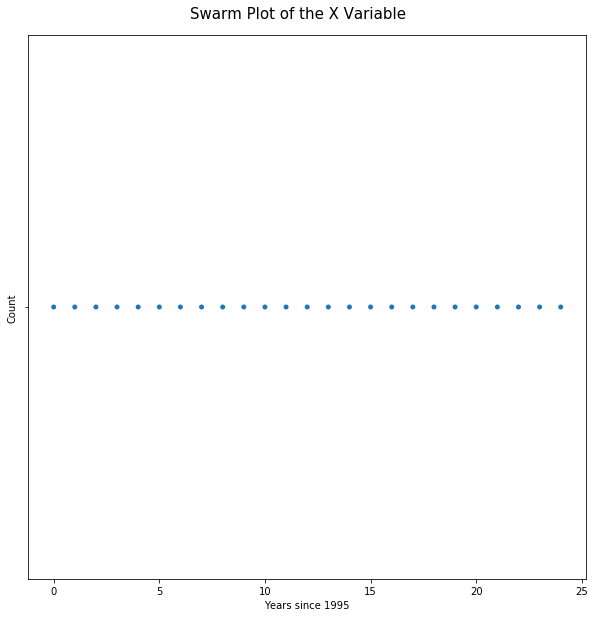

In [33]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(year_prices['Years_Since_1995'])
plt.xlabel('Years since 1995')
plt.ylabel('Count')
fig.suptitle('Swarm Plot of the X Variable', fontsize=15, y=0.92)

hide_toggle()

Note how the swarm plot is uniform. This is a good example of a swarm plot being more helpful than a histogram (when a histogram is overly dependent on the number of bins set).

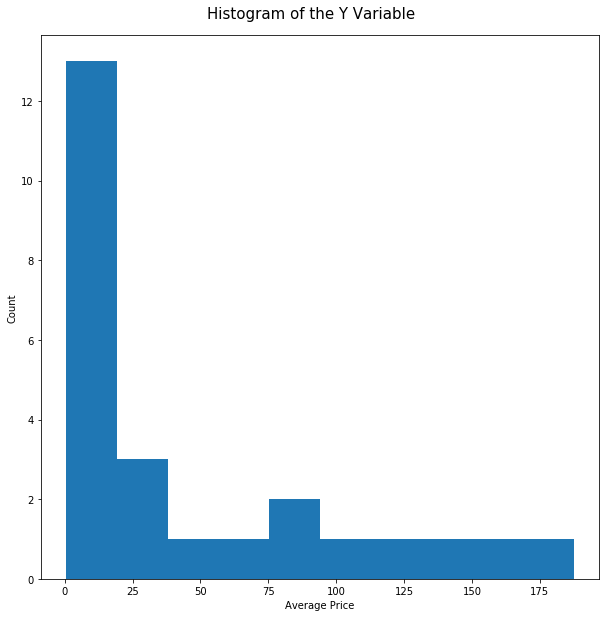

In [45]:
fig = plt.figure(figsize=(10,10))
plt.hist(year_prices['Avg_Price'], bins=10)
plt.xlabel('Average Price')
plt.ylabel('Count')
fig.suptitle('Histogram of the Y Variable', fontsize=15, y=0.92)

hide_toggle()

The Y variable on the other hand, is positively skewed, which we can transform via reducing the high outliers.

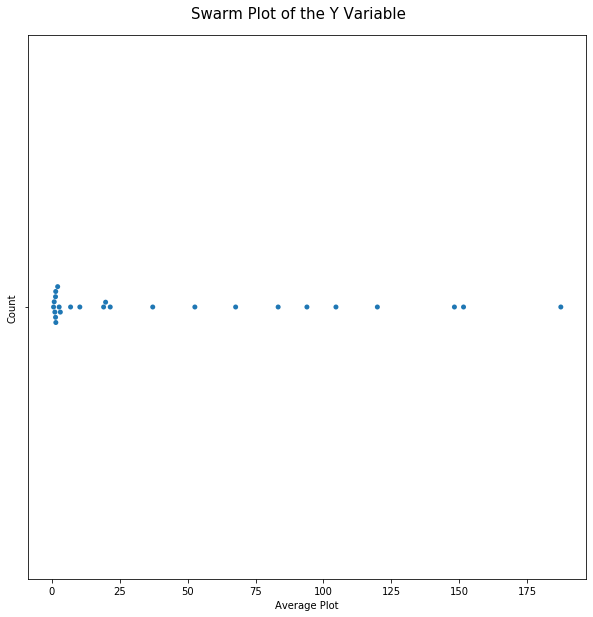

In [46]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(year_prices['Avg_Price'])
plt.xlabel('Average Plot')
plt.ylabel('Count')
fig.suptitle('Swarm Plot of the Y Variable', fontsize=15, y=0.92)

hide_toggle()

Again, this is a little more clearly defined via a swarm plot.

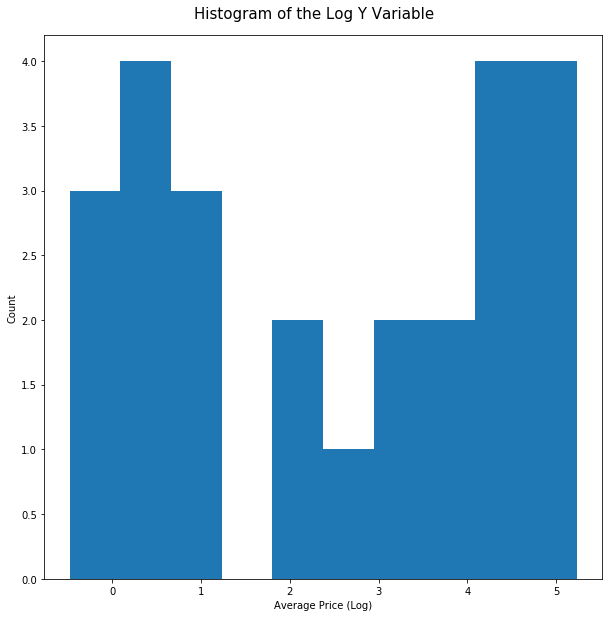

In [47]:
fig = plt.figure(figsize=(10,10))
plt.hist(np.log(year_prices['Avg_Price']), bins=10)
plt.xlabel('Average Price (Log)')
plt.ylabel('Count')
fig.suptitle('Histogram of the Log Y Variable', fontsize=15, y=0.92)

hide_toggle()

Here is a histogram of the log transformed Y variable.

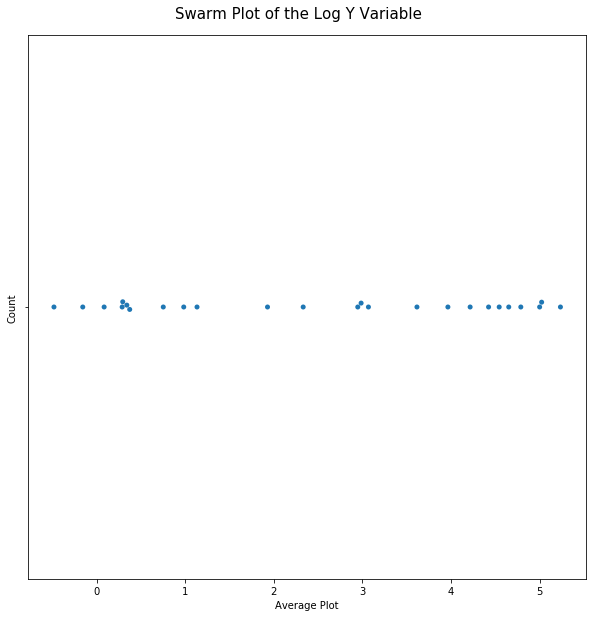

In [48]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(np.log(year_prices['Avg_Price']))
plt.xlabel('Average Plot')
plt.ylabel('Count')
fig.suptitle('Swarm Plot of the Log Y Variable', fontsize=15, y=0.92)

hide_toggle()

The log of the Y variable looks much closer to a uniform distribution.

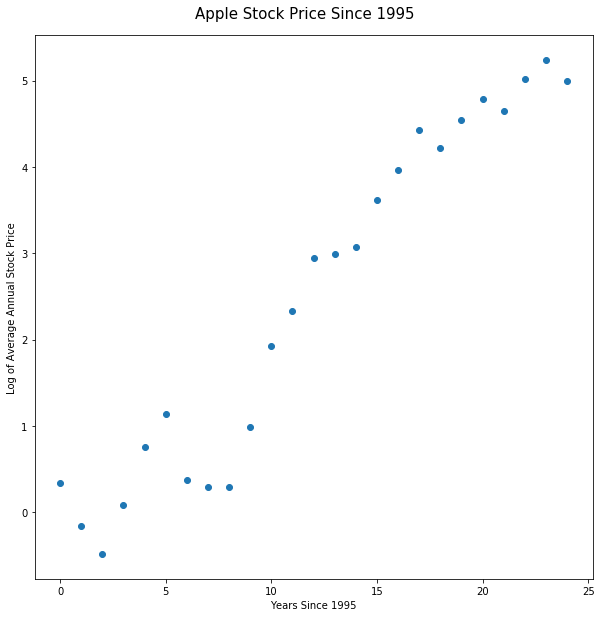

In [49]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], np.log(year_prices['Avg_Price']))
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Log of Average Annual Stock Price')

hide_toggle()

And the resulting relationship looks much closer to being linear via scatterplot.

In [39]:
apple_log_slope, apple_log_intercept, apple_log_predictions, apple_log_residuals = utils.evaluate_linear_relationship(year_prices['Years_Since_1995'], np.log(year_prices['Avg_Price']))

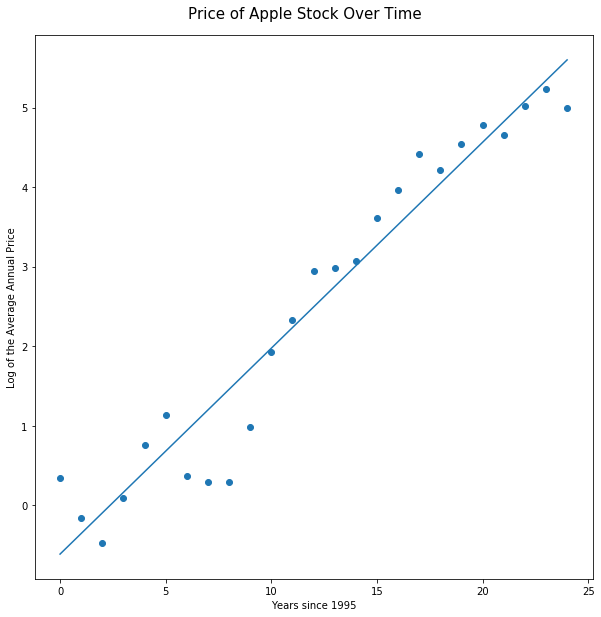

In [50]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], np.log(year_prices['Avg_Price']))
sorted_order = np.argsort(year_prices['Years_Since_1995'])
plt.plot(year_prices['Years_Since_1995'][sorted_order], apple_log_predictions[sorted_order])
plt.xlabel('Years since 1995')
plt.ylabel('Log of the Average Annual Price')
fig.suptitle('Price of Apple Stock Over Time', fontsize=15, y=0.92)

hide_toggle()

Now, the best-fit line looks to capture the relationship between the two variables!

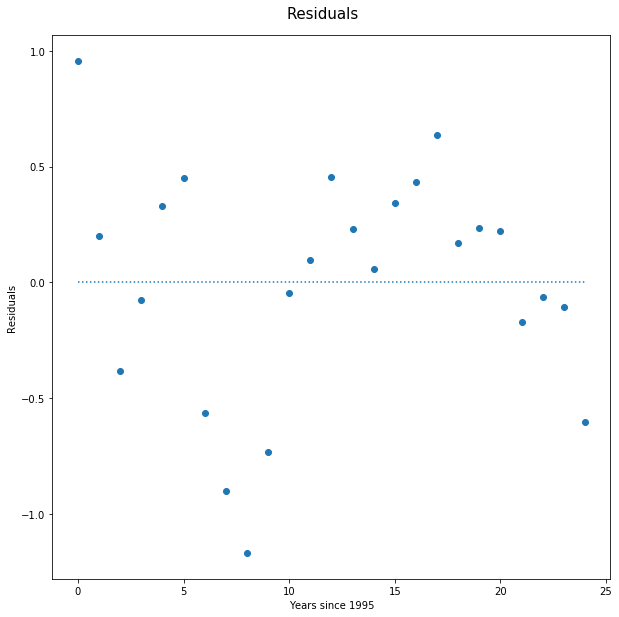

In [51]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Years_Since_1995'], apple_log_residuals)
plt.plot([0, year_prices['Years_Since_1995'].max()], [0,0], linestyle='dotted')
plt.xlabel('Years since 1995')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

hide_toggle()

And the residuals are homoskedastic!

In [42]:
print('Slope:', apple_log_slope)
print('Intercept:', apple_log_intercept)
print('Exponent of Slope:', np.exp(0.258) - 1)

Slope: 0.25891966274127237
Intercept: -0.6138412727525164
Exponent of Slope: 0.2943388186242377


Note that the premise of our slope and intercept change now. In 1995, the **log** of the price of the Apple stock is predicted to be -\\$0.61 (about \\$0.54). In 2015, the price of the Apple stock is predicted to be \\$96.01 (the exponent of (0.258 * 20) - 0.613).

The price of Apple Stock will go up about 29\% every year after 1995.

While for a regular slope, we say that the Y value will increase by the slope amount every year, for a log transformed Y value, we say that the Y value will increase by the exponent of the slope minus 1 every year.

Note that for this week we will only be transforming the **response** or **Y** variable for regression. We will learn how to properly transform the **predictor** or **X** variable next week.

# Final Points

 * The more positive the slope, the more each increment of X increases the value of Y
 * The more negative the slope, the more each increment of X decrases the value of Y.
 * The higher the R-squared, the better predictor X is of Y.
 * A high slope isn't correlated with a high R-squared value! A linear relationship could have a high R-squared with a small slope value, or vice versa.
 * The R-squared and slope value are only relevant if the relationship between the X and Y values is **linear**.